In [35]:
import pandas as pd

df = pd.read_csv('dataset.csv', parse_dates=['timestamp'])[["meter","timestamp","meter_reading_scaled"]]
df['day'] = df['timestamp'].dt.date
df['month'] = df['timestamp'].dt.month
df['quarter'] = df['timestamp'].dt.quarter
df['month_name'] = df['timestamp'].dt.month_name()


In [11]:
line_chart_data = df.groupby('meter')['meter_reading_scaled'].apply(list)

In [17]:
df = df.groupby(['meter', 'day'])['meter_reading_scaled'].sum().reset_index()

In [18]:
grouped_data

,meter,day,meter_reading_scaled
0,1,2016-01-01,31.087781
1,1,2016-01-02,31.677552
2,1,2016-01-03,33.229837
3,1,2016-01-04,33.401435
4,1,2016-01-05,32.341254
...,...,...,...
727,3,2016-12-27,162.521379
728,3,2016-12-28,125.274500
729,3,2016-12-29,131.252772
730,3,2016-12-30,143.951251


In [20]:
import sesd
import numpy as np
outliers_indices_1 = sesd.seasonal_esd(df[df["meter"]==1]["meter_reading_scaled"].values, periodicity = 30,  max_anomalies=len(df[df["meter"]==1]["meter_reading_scaled"].values)//8, alpha = 3)
outliers_indices_3 = sesd.seasonal_esd(df[df["meter"]==3]["meter_reading_scaled"].values, periodicity = 30,  max_anomalies=len(df[df["meter"]==3]["meter_reading_scaled"].values)//8, alpha = 3)
marks_1=[]
data = df[df["meter"]==1]["meter_reading_scaled"].values
for i in range(len(data)):
    if i in outliers_indices_1:
        marks_1.append(data[i])
marks_3=[]
data = df[df["meter"]==3]["meter_reading_scaled"].values
for i in range(len(data)):
    if i in outliers_indices_3:
        marks_3.append(data[i])
th = [np.average(marks_1), np.average(marks_3)]
df

In [36]:
df1 = df.groupby(['meter', 'day'])['meter_reading_scaled'].sum().reset_index()

In [37]:
df1

,meter,day,meter_reading_scaled
0,1,2016-01-01,31.087781
1,1,2016-01-02,31.677552
2,1,2016-01-03,33.229837
3,1,2016-01-04,33.401435
4,1,2016-01-05,32.341254
...,...,...,...
727,3,2016-12-27,162.521379
728,3,2016-12-28,125.274500
729,3,2016-12-29,131.252772
730,3,2016-12-30,143.951251


In [31]:
len(data)

366

In [2]:
df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [4]:
grouped = df.groupby(["meter", "timestamp"]).agg({
    "meter_reading": "mean"
})

In [27]:
grouped[grouped.index.get_level_values(0) == 1]

meter_reading
meter timestamp                         
1     2016-01-01 00:00:00     115.157290
      2016-01-01 01:00:00     131.238781
      2016-01-01 02:00:00     128.894491
      2016-01-01 03:00:00     122.968344
      2016-01-01 04:00:00     118.597719
...                                  ...
      2016-12-31 19:00:00     203.489944
      2016-12-31 20:00:00     197.311454
      2016-12-31 21:00:00     192.898232
      2016-12-31 22:00:00     180.646288
      2016-12-31 23:00:00     167.785010

[8784 rows x 1 columns]

In [175]:
pd.concat([grouped[grouped.index.get_level_values(0) == 1], grouped[grouped.index.get_level_values(0) == 3]]).to_csv("dataset.csv")

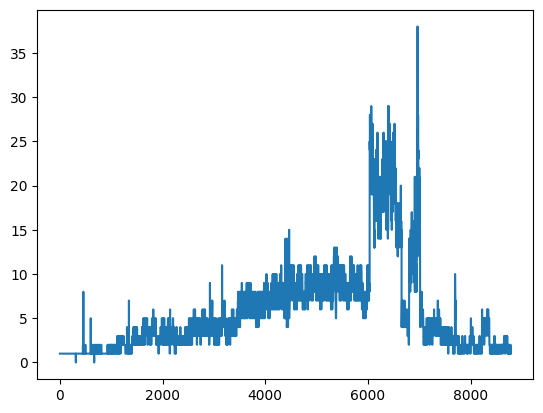

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure()
#plt.plot(grouped[grouped.index.get_level_values(0) == 0]["meter_reading"].values//100)
plt.plot(grouped[grouped.index.get_level_values(0) == 1]["meter_reading"].values//100)
plt.show()

In [44]:
import sesd

In [89]:
outliers_indices = sesd.seasonal_esd(grouped[grouped.index.get_level_values(0) == 1]["meter_reading"].values/100, periodicity = 30,  max_anomalies=len(grouped[grouped.index.get_level_values(0) == 1]["meter_reading"].values//100)//8, alpha = 3)

In [90]:
import numpy as np
marks = []
data = grouped[grouped.index.get_level_values(0) == 1]["meter_reading"].values/100
for i in range(len(data)):
    if i in outliers_indices:
        marks.append(data[i])
    else:
        marks.append(np.NAN)

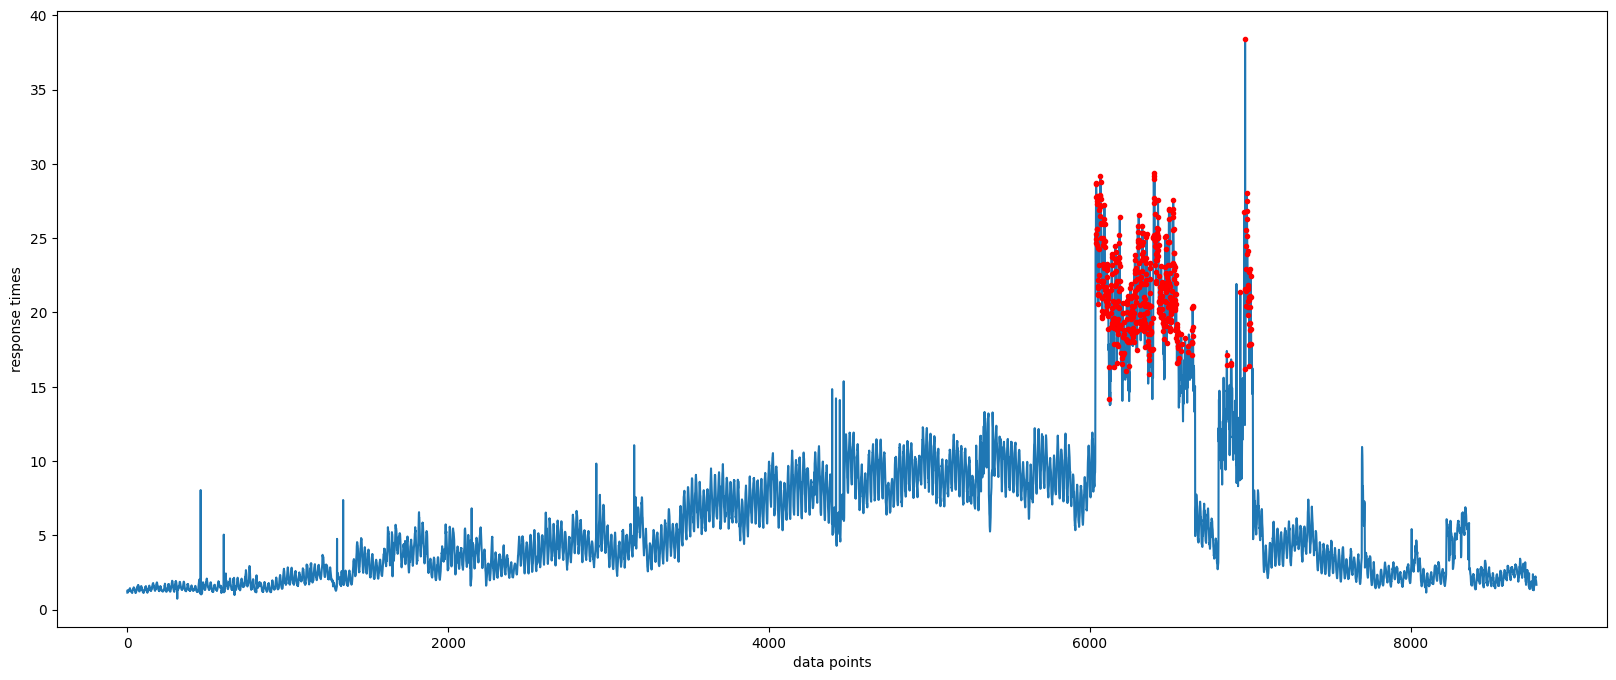

In [91]:
plt.figure(figsize = (20,8))
plt.plot(grouped[grouped.index.get_level_values(0) == 1]["meter_reading"].values/100, linestyle = '-', label ='ResponseTime')
plt.plot(marks, 'ro', markersize = "3", label ='Anomaly')

plt.ylabel('response times')
plt.xlabel('data points')
plt.show()

In [92]:
marks = np.array(marks)
np.average(marks[~np.isnan(marks)])

21.56797207002006

In [102]:
grouped[grouped.index.get_level_values(0) == 1]["meter_reading"] = grouped[grouped.index.get_level_values(0) == 1]["meter_reading"].apply(lambda x: x/100)

In [112]:
grouped["meter_reading_scaled"] =  grouped["meter_reading"].apply(lambda x: x/100)

In [114]:
grouped[grouped.index.get_level_values(0) == 1]["meter_reading_scaled"]

meter  timestamp          
1      2016-01-01 00:00:00    1.151573
       2016-01-01 01:00:00    1.312388
       2016-01-01 02:00:00    1.288945
       2016-01-01 03:00:00    1.229683
       2016-01-01 04:00:00    1.185977
                                ...   
       2016-12-31 19:00:00    2.034899
       2016-12-31 20:00:00    1.973115
       2016-12-31 21:00:00    1.928982
       2016-12-31 22:00:00    1.806463
       2016-12-31 23:00:00    1.677850
Name: meter_reading_scaled, Length: 8784, dtype: float64

In [97]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [121]:
meta_df = pd.DataFrame(grouped[grouped.index.get_level_values(0) == 1]["meter_reading_scaled"])

In [123]:
metadata.detect_from_dataframe(meta_df)

In [124]:
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "meter_reading_scaled": {
            "sdtype": "numerical"
        }
    }
}

In [132]:
from sdv.single_table import TVAESynthesizer

# Step 1: Create the synthesizer
synthesizer = TVAESynthesizer(metadata)

# Step 2: Train the synthesizer
synthesizer.fit(meta_df)

# Step 3: Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=len(meta_df))

c:\Users\z004dmfe\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


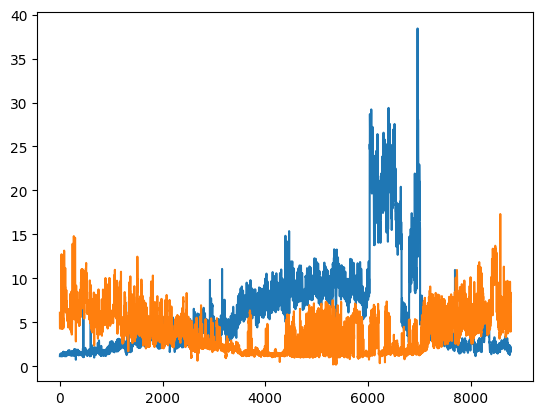

In [155]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(meta_df.values)
plt.plot(grouped[grouped.index.get_level_values(0) == 3]["meter_reading"].values/100)

plt.show()

In [156]:
grouped

meter_reading  meter_reading_2  \
meter timestamp                                             
0     2016-01-01 00:00:00     105.761506         1.057615   
      2016-01-01 01:00:00     120.172984         1.201730   
      2016-01-01 02:00:00     120.153222         1.201532   
      2016-01-01 03:00:00     120.308740         1.203087   
      2016-01-01 04:00:00     120.591857         1.205919   
...                                  ...              ...   
3     2016-12-31 19:00:00     421.017868         4.210179   
      2016-12-31 20:00:00     393.986782         3.939868   
      2016-12-31 21:00:00     837.192757         8.371928   
      2016-12-31 22:00:00     762.285971         7.622860   
      2016-12-31 23:00:00     736.905068         7.369051   

                           meter_reading_scaled  
meter timestamp                                  
0     2016-01-01 00:00:00              1.057615  
      2016-01-01 01:00:00              1.201730  
      2016-01-01 02:00:00              1.201532  
      2016-01-01 03:00:00              1.203087  
      2016-01-01 04:00:00              1.205919  
...                                         ...  
3     2016-12-31 19:00:00              4.210179  
      2016-12-31 20:00:00              3.939868  
      2016-12-31 21:00:00              8.371928  
      2016-12-31 22:00:00              7.622860  
      2016-12-31 23:00:00              7.369051  

[35136 rows x 3 columns]